# Applications of Data Science
# Lab 3-Py
# Preparing Text Data with Python

## Overview

This lab introduces you to the basics of text mining and text data preparation. In this lab you will work with a set of 160,000 tweets, which include sentiment labels. 

Social media sentiment is an important indicator of public opinion.  Determining sentiment can be valuable in a number of applications including brand awareness, product launches, and detecting political trends. 

Raw text is inherently messy. Machine understanding and analysis is inhibited by the presence of extraneous symbols and words that clutter the text. The exact nature of the required text cleaning depends on the application.  In this case, you will focus on text cleaning to facilitate sentiment classification. The presence of certain words determine the sentiment of the tweet. Words and symbols which are extraneous to this purpose are distractions at best, and a likely source of noise in the analysis. You will follow these steps to prepare the tweet text for analysis: 

- Symbols and unnecessary white space which do not convey sentiment are removed, leaving only alphabetic characters.
- There is no difference in the sentiment conveyed by a word in upper case or lower case, so all case is set to lower. 
- Stop words are words that occur with high frequency in text, but do not have any particular meaning. Examples include word like ÃÂ¢ÃÂÃÂtheÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂandÃÂ¢ÃÂÃÂ and ÃÂ¢ÃÂÃÂthisÃÂ¢ÃÂÃÂ. Since these words are relatively common, yet communicate no particular sentiment, they can bias analytics.  Therefore, stop words which do not convey sentiment are therefore removed from the tweet text.
- stem is a root word. For example, ÃÂ¢ÃÂÃÂgoÃÂ¢ÃÂÃÂ is the root word of conjugated verbs, ÃÂ¢ÃÂÃÂgoingÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂgoesÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂgoneÃÂ¢ÃÂÃÂ. The meaning of these words is the same in terms of analysis. A process known as stemming is applied to transform words to their roots, before analysis. 


## What you will need
To complete this lab, you will need the following:
- A web browser and Internet connection
- An Azure ML workspace
- The lab files for this lab


## Load and transform the tweet data

As a first step, ensure that you have uploaded the **tweets.csv** and **stopwords.csv** files as new datasets in your Azure Machine Learning workspace. Then use the following code to load the tweets data set and set the column names to convenient values.

In [1]:
%matplotlib inline
import pandas as pd
from azureml import Workspace
ws = Workspace()
ds = ws.datasets['tweets.csv']
dataset = ds.to_dataframe()
dataset.columns = ['sentiment', 'tweets']
dataset.head()

/home/nbuser/anaconda2_20/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,sentiment,tweets
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


Examine the head of the data frame shown above, noticing the content of the two columns.
- The Sentiment column contains a sentiment score {0,4} for negative of positive sentiment of the tweet.
- The Tweets column contains the actual text of the tweet.


## Normalize the text

You will now normalize the tweet text. The code in the cell below performs the following operations:
- Remove numbers.
- Remove punctuation.
- Convert to lower case.

In [2]:
import string
sp = string.punctuation
tweets = dataset['tweets'].tolist()
tweets = map(lambda t: ''.join(["" if c.isdigit() else c for c in t]), tweets)
tweets = map(lambda t: ''.join(["" if c in sp else c for c in t]), tweets)
tweets = map(string.lower, tweets)
tweets[:5]

[u'elephantbird hey dear happy friday to you  already had your rices bowl for lunch ',
 u'ughhh layin downnnn    waiting for zeina to cook breakfast',
 u'greeniebach i reckon hell play even if hes not but i know nothing  it wont be the same without him',
 u'valewee i know  saw it on the news',
 u'very sad that httpwwwfabchannelcom has closed down one of the few web services that ive used for over  years']

Examine the tweet text. All of the characters are lower case and there are no punctuation characters, or numbers. 

Next, you will compute the counts and cumulative frequencies of the words in the tweets. The **nltk** package contains two tools to help:

The ** regexp_tokenize** functuon tokenizes the text. Tokenization is the process of dividing the text into its component tokens. In this case, the tokes are all words, since you are working with normalized text.

The ** FreqDist** function computes the frequency distribution of words in a text corpus. A Pandas data frame is then computed from the word frequency array. 

Execute the code in the cell below to compute the word frequency and examine the head of the data frame.


In [3]:
def to_TF(tweets):
    import pandas as pd
    import nltk
    tweets = map(lambda t: nltk.regexp_tokenize(t, r'\S+'), tweets)
    tweets = [w for l in tweets for w in l]

    ## Compute the frequency distribution of the words as a dictionary
    ## and then create a dataframe contaning the words and
    ## counts indexed by the words.
    fdist = nltk.FreqDist(tweets) 
    count_frame = pd.DataFrame(fdist.items(), columns = ['Word', 'Count']) 
    count_frame = count_frame.sort_values('Count', ascending = False)
    return count_frame.set_index('Word', drop = False) #, inplace = True)
 
wf = to_TF(tweets)
wf.head(n = 20)

,Word,Count
Word,,
i,i,74980
to,to,56329
the,the,51708
a,a,37950
my,my,31680
and,and,30083
you,you,26978
is,is,23724
it,it,23179


Notice that the most frequent words are in the head of this data frame. Of these 20 most frequent words none are likely to convey much information on sentiment.  

The code in the cell below, creates a bar plot of word frequency for the most common 60 words. 

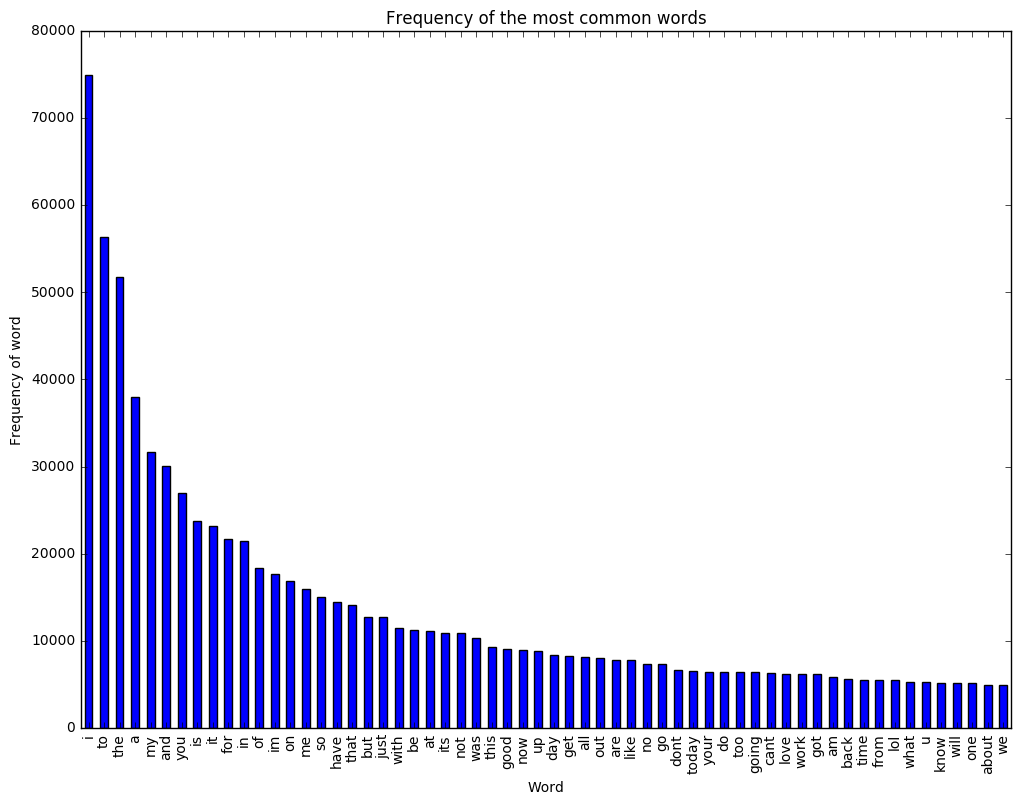

'Done'

In [4]:
def wf_bar(wf):
    import matplotlib.pyplot as plt
    ## Barplot of the most fequent words.   
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca()    
    wf['Count'][:60].plot(kind = 'bar', ax = ax)
    ax.set_title('Frequency of the most common words')
    ax.set_ylabel('Frequency of word')
    ax.set_xlabel('Word')
    plt.show()
    return 'Done'
wf_bar(wf)

Examine this plot and notice the most frequent words. Many of the most frequent words are stop words, such as ÃÂ¢ÃÂÃÂtheÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂandÃÂ¢ÃÂÃÂ, and ÃÂ¢ÃÂÃÂyouÃÂ¢ÃÂÃÂ, which are not likely to be helpful in determining sentiment. Also, the frequency of the words drops off fairly quickly to less than 500 out of the 160,000 tweets.

Another tool for examining the frequency of words in a corpus of documents is the cumulative distribution frequency (CDF) plot. Execute the code in the cell below to compute and display a bar plot of the cumulative frequencies of the words.

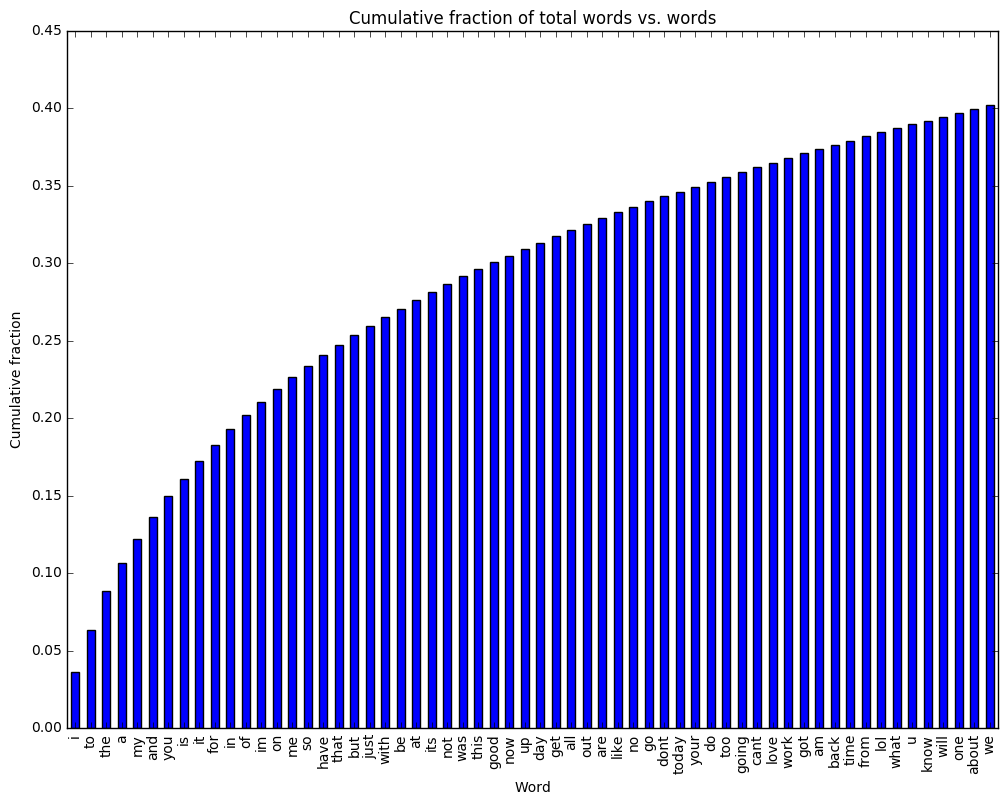

'Done'

In [5]:
def plot_cfd(wf):
    import matplotlib.pyplot as plt
    ## Compute the relative cumulative frequency of the words in 
    ## descending order of frequency and add the dataframe.   
    word_count = float(wf['Count'].sum(axis = 0))   
    wf['Cum'] = wf['Count'].cumsum(axis = 0)
    wf['Cum'] = wf['Cum'].divide(word_count)
    
    ## Barplot the cumulative frequency for the most frequent words.   
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca()    
    wf['Cum'][:60].plot(kind = 'bar', ax = ax)
    ax.set_title('Cumulative fraction of total words vs. words')
    ax.set_ylabel('Cumulative fraction')
    ax.set_xlabel('Word')
    plt.show()
    return 'Done'


plot_cfd(wf)

The conclusions one can draw from the second chart are largely the same as the first. The most frequent words are stop words and the frequency of words drops off rather quickly. Also notice, that the frequency of the words becomes uniform fairly quickly. 

****

You will now examine the head of the resulting word frequency data frame to determine the following:
- What is the percentage of all words for these first 20 words?
- Of these 20 words, how many are likely to contibute sentiment information?
- Are these 20 words different from the words seen for the raw text?

To perform this exercise, apply the Pandas **head** method, with **n = 20**, to the wf data frame.



In [6]:
wf.head(n = 20)

,Word,Count,Cum
Word,,,
i,i,74980,0.036216
to,to,56329,0.063423
the,the,51708,0.088398
a,a,37950,0.106728
my,my,31680,0.122030
and,and,30083,0.136560
you,you,26978,0.149590
is,is,23724,0.161049
it,it,23179,0.172245


## Remove stop words
convey much sentiment. These frequent words, which are largely extraneous, are known as stop words and should be removed from the text before further analysis. In this exercise you will use custom R or Python code to remove stop words from the tweet text.

As a first step you will load the list of stop words, and examine the first 20 by executing the code in the cell below.

In [7]:
sw = ws.datasets['stopwords.csv']
stop_words = sw.to_dataframe()
stop_words = [w for w in stop_words.words if w in stop_words.words.unique() ]
stop_words[:20]

[u'a',
 u'about',
 u'above',
 u'actual',
 u'after',
 u'again',
 u'against',
 u'all',
 u'alreadi',
 u'also',
 u'alway',
 u'am',
 u'amp',
 u'an',
 u'and',
 u'ani',
 u'anoth',
 u'any',
 u'anyth',
 u'are']

Execute the code in the cell below to remove the stop words from each tweet using nested list comprehensions. 

In [8]:
temp = [tweet.split() for tweet in tweets] ## Split tweets into tokens
tweets = [' '.join([word for word in tweet if word not in set(stop_words)]) for tweet in temp]

Execute the code in the cell below to visualize the word frequency.

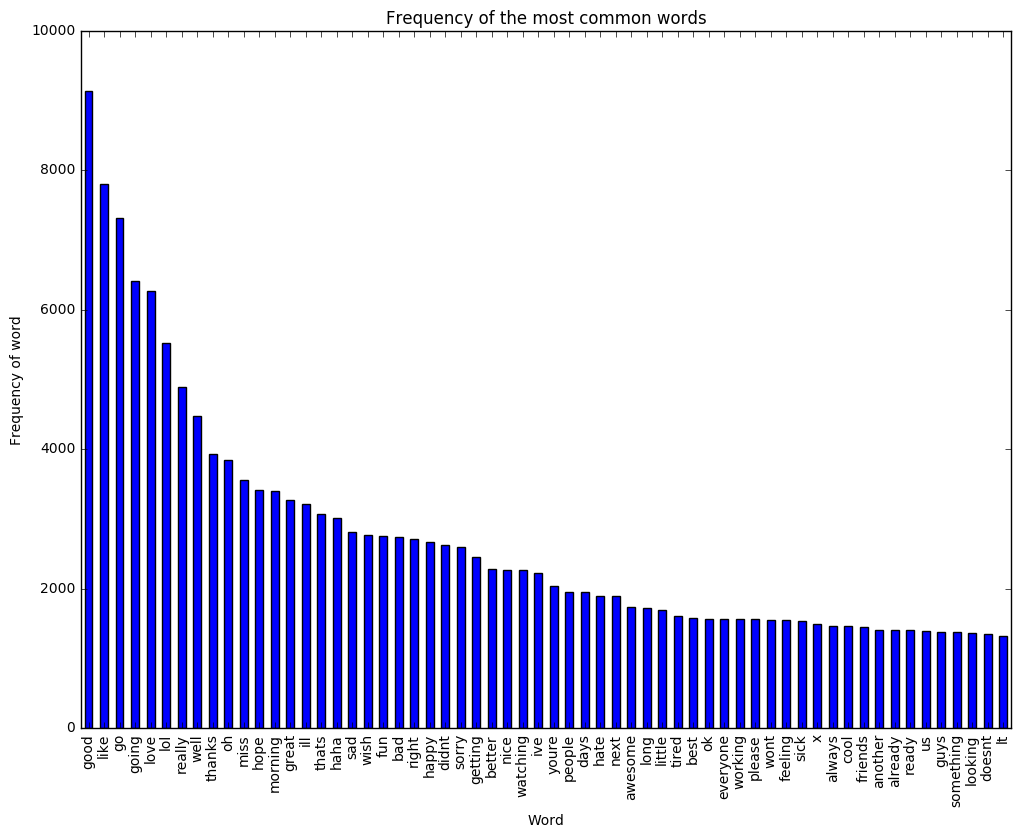

'Done'

In [9]:
wf = to_TF(tweets)
wf_bar(wf)

The distribution of word frequency is not quite different. Note that many of the most frequent words are now likely to convey some sentiment, such as ÃÂ¢ÃÂÃÂgoodÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂlikeÃÂ¢ÃÂÃÂ, and ÃÂ¢ÃÂÃÂlove. Evidently, removing stop words has had the desired effect.

Next, execute the code in the cell below to display the CDF of the tweets with the stop words removed. 

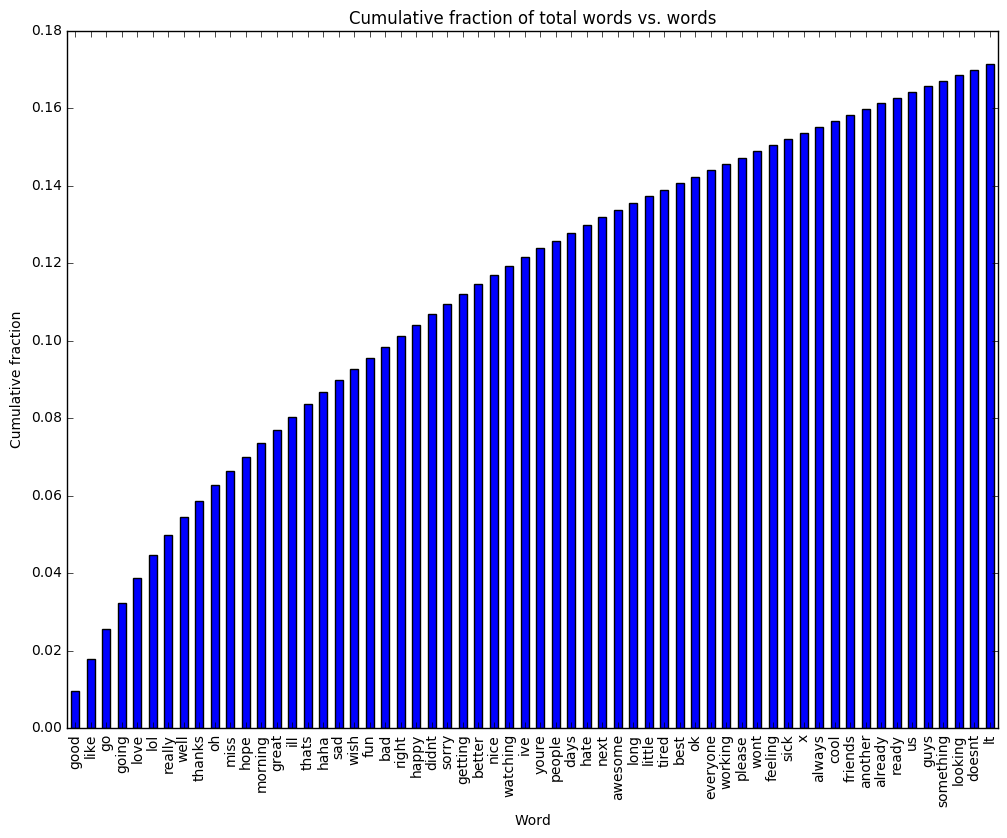

'Done'

In [10]:
plot_cfd(wf)

As before, this chart shows a number of frequent words which are likely to convey sentiment. However, note that these 60 most frequent words only make up about 17% or the total.

****

You will now examine the head of the resulting word frequency data frame to determine the following:

- What is the percentage of all words for these first 20 words? 
- Of these 20 words, how many are likely to contribute sentiment information? 
- Are these 20 words different from the words seen for the normalized text? 

To perform this exercise, apply the Pandas **head** method, with **n = 20**, to the wf data frame.
****

In [11]:
wf.head(n = 20)

,Word,Count,Cum
Word,,,
good,good,9133,0.009602
like,like,7796,0.017799
go,go,7320,0.025495
going,going,6407,0.032231
love,love,6269,0.038822
lol,lol,5517,0.044623
really,really,4888,0.049762
well,well,4474,0.054466
thanks,thanks,3927,0.058595


## Stem the Words

You have cleaned the tweet text and removed stop words. There is one last data preparation step required, stemming the words. Stemming is a process of reducing words to their stems or roots. For example, conjugated verbs such as ÃÂ¢ÃÂÃÂgoesÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂgoingÃÂ¢ÃÂÃÂ, and ÃÂ¢ÃÂÃÂgoneÃÂ¢ÃÂÃÂ are stemmed to the word ÃÂ¢ÃÂÃÂgoÃÂ¢ÃÂÃÂ.  Both Python and R offer a choice of stemmers. Depending on this choice, the results can be more or less suitable for the application. In this case, you will use the popular Porter stemmer. 

The Porter stemmer used by the **PorterStemmer** function in the **nltk.stem.porter** library. Execute the code in the cell below to load and apply the Porter stemmer to the tweet text and display the first few tweets with stemmed words.

In [12]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
temp = [tweet.split() for tweet in tweets] ## Split tweets into tokens
temp = map(lambda t: [porter_stemmer.stem(w) for w in t], temp)
tweets = [' '.join(tweet) for tweet in temp] ## Join the words of the tweet string
tweets[:10]


[u'elephantbird dear happi alreadi rice bowl',
 u'ughhh layin downnnn wait zeina cook breakfast',
 u'greeniebach reckon hell he noth wont without',
 u'valewe news',
 u'sad httpwwwfabchannelcom close web servic ive use year',
 u'fearnecotton sing rememb alwaysss radio catch artist',
 u'god ur side anyth possibl',
 u'lovesmr stupid',
 u'delv gut express engin flexibl cm dev great client',
 u'emoskank awww']

Compare the text in the tweets to the text for the normalized text. Notice that there are fewer words in these tweets following the removal of stop words. Also, words like 'happy' have been stemmed to 'happi'.  This text is now ready for analysis!

To display the bar plot of the word frequency, execute the code in the cell below.

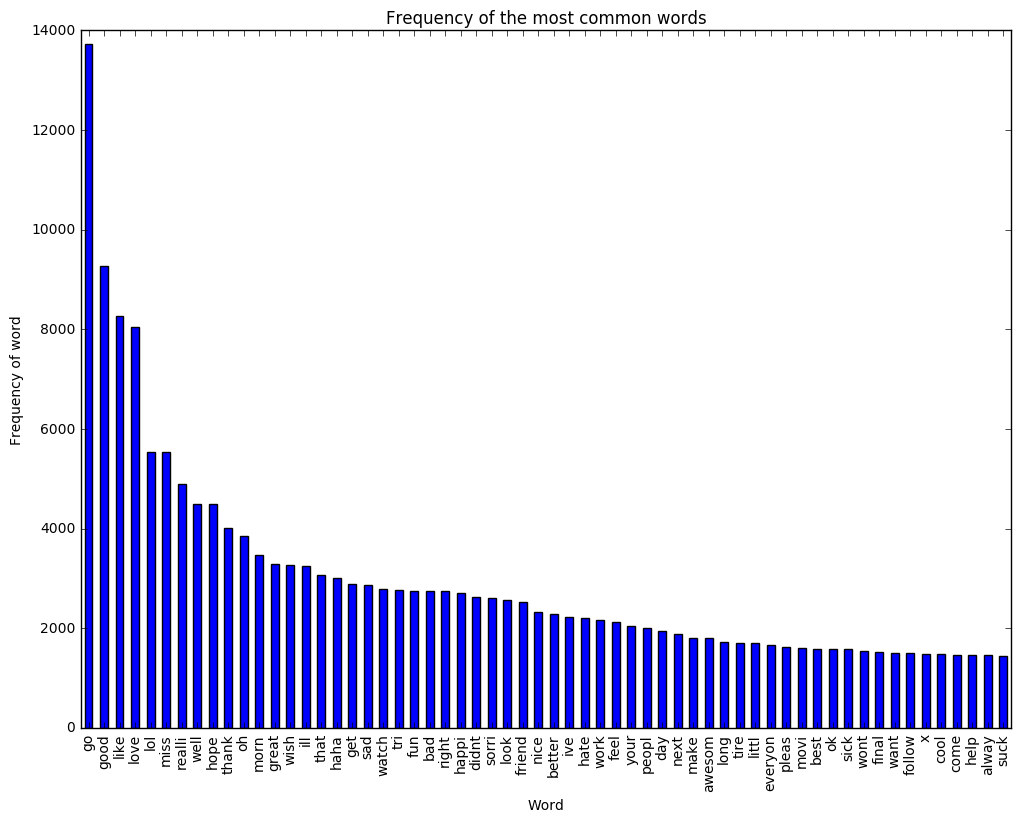

'Done'

In [13]:
wf = to_TF(tweets)
wf_bar(wf)

To display the CDF plot of the word frequency, execute the code in the cell below.

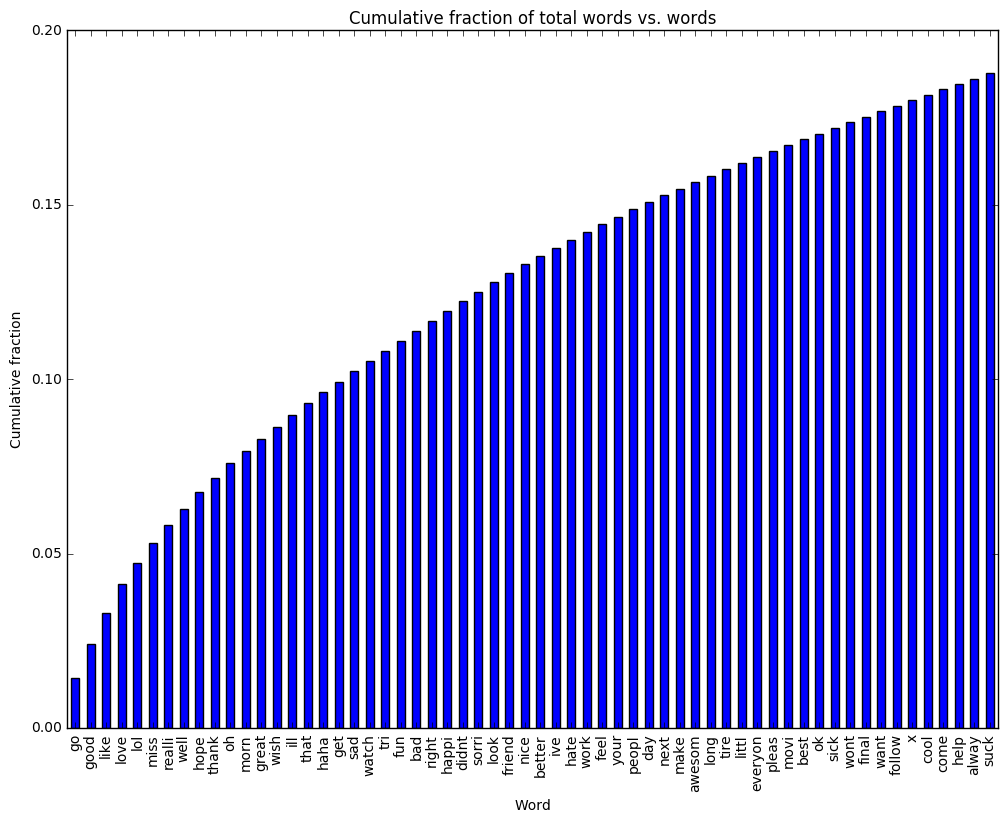

'Done'

In [14]:
plot_cfd(wf)

Compare these two charts using the stemmed words to the charts created with just stop word filtering and notice the differences. These differences are quite noticeable. For example, some words like ÃÂ¢ÃÂÃÂgoodÃÂ¢ÃÂÃÂ and 'like' have moved higher in the order of most frequent words, while some other words like ÃÂ¢ÃÂÃÂgoingÃÂ¢ÃÂÃÂ have moved down. 

****

You will now examine the head of the resulting word frequency data frame to determine the following:

- Have any of the words in the list been stemmed? 
- Has the stemming changed the frequency of these words?

To perform this exercise, apply the Pandas **head** method, with **n = 20**, to the wf data frame.
****

In [15]:
wf.head(n = 20)

,Word,Count,Cum
Word,,,
go,go,13729,0.014434
good,good,9268,0.024179
like,like,8275,0.032879
love,love,8054,0.041347
lol,lol,5537,0.047168
miss,miss,5537,0.052990
realli,realli,4888,0.058129
well,well,4492,0.062852
hope,hope,4491,0.067574
